## Question to solve for 

In [6]:
## country-wise crime

## Import dependencies 

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
sns.set_style("ticks",  {"xtick.major.size":8,
"ytick.major.size":8})

In [138]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')
df.head()

C:\Users\Shahjahan.DESKTOP-MBDJTPL\AppData\Local\Temp\ipykernel_30040\825060934.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Picking out useful columns  

In [139]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

## Years 

In [140]:
df.iyear.unique()
# years :- 1970 - 2017 

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [141]:
df.imonth.unique()
# all 12 months

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

## Country 

In [142]:
len(df.country_txt.unique())
# 205 countries

205

In [143]:
df.region.unique()
# 12 regions

array([ 2,  1,  5,  8,  4,  3,  9, 11, 10, 12,  6,  7], dtype=int64)

In [144]:
df.region_txt.unique()
# 12 regions named

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [145]:
df.provstate.unique()
# 12 regions

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [146]:
df.city.unique()
# 12 regions

array(['Santo Domingo', 'Mexico city', 'Unknown', ..., 'Hungrum',
       'Ceelka Geelow', 'Kubentog'], dtype=object)

In [147]:
df.specificity.unique()
# 12 regions

array([ 1.,  4.,  5.,  2.,  3., nan])

## Crime 

In [148]:
df.alternative_txt.unique()
# types of crimes

array([nan, 'Other Crime Type', 'Insurgency/Guerilla Action',
       'Intra/Inter-group Conflict', 'State Actors',
       'Lack of Intentionality'], dtype=object)

In [149]:
df.success.unique()
# success of a terrorist attack

array([1, 0], dtype=int64)

In [150]:
df.attacktype1_txt.unique()
# attack type

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [151]:
df.targtype1_txt.unique()
# category of target

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [152]:
df.targsubtype1_txt.unique()
# specific target

array(['Named Civilian',
       'Diplomatic Personnel (outside of embassy, consulate)',
       'Radio Journalist/Staff/Facility', 'Embassy/Consulate',
       'Police Building (headquarters, station, school)',
       'Police Security Forces/Officers', 'Electricity',
       'Military Recruiting Station/Academy',
       'Government Building/Facility/Office',
       'Military Barracks/Base/Headquarters/Checkpost',
       'Aircraft (not at an airport)', 'Retail/Grocery/Bakery', nan,
       'Military Personnel (soldiers, troops, officers, forces)',
       'School/University/Educational Building',
       'Multinational Corporation', 'Party Office/Facility',
       'House/Apartment/Residence', 'Race/Ethnicity Identified',
       'Judge/Attorney/Court',
       'Police Patrol (including vehicles and convoys)',
       'Place of Worship', 'Vehicles/Transportation',
       'Bus (excluding tourists)',
       'Politician or Political Party Movement/Meeting/Rally',
       'Hotel/Resort', 'Airport', 'B

## Damage 

In [153]:
df.propcomment.unique()

array([nan, 'Three transformers were damaged.',
       'Basketball courts, weight room, swimming pool, gymnastic equipment, and lockers were destroyed.',
       ..., 'Several construction vehicles were damaged in the attack.',
       "A migrants' center was damaged in this attack.",
       'Seven military planes were damaged in this attack.'], dtype=object)

In [154]:
df.propextent_txt.unique()
# amount of prop damage 

array([nan, 'Minor (likely < $1 million)',
       'Major (likely >= $1 million but < $1 billion)', 'Unknown',
       'Catastrophic (likely >= $1 billion)'], dtype=object)

## Weapons 

In [155]:
df.weaptype1_txt.unique()
# category of weapon

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [156]:
df.weapsubtype1_txt.unique()
# specific weapon

array([nan, 'Unknown Explosive Type', 'Unknown Gun Type',
       'Automatic or Semi-Automatic Rifle',
       'Molotov Cocktail/Petrol Bomb', 'Gasoline or Alcohol',
       'Rifle/Shotgun (non-automatic)', 'Arson/Fire', 'Pipe Bomb',
       'Vehicle', 'Dynamite/TNT', 'Pressure Trigger', 'Time Fuse',
       'Other Explosive Type', 'Poisoning',
       'Projectile (rockets, mortars, RPGs, etc.)', 'Handgun',
       'Letter Bomb', 'Blunt Object', 'Sticky Bomb', 'Grenade',
       'Knife or Other Sharp Object', 'Landmine', 'Hands, Feet, Fists',
       'Remote Trigger', 'Rope or Other Strangling Device', 'Explosive',
       'Unknown Weapon Type', 'Suffocation',
       'Suicide (carried bodily by human being)', 'Other Gun Type'],
      dtype=object)

## Group of attackers 

In [157]:
df.gname.unique().tolist()
# group name of attackers

['MANO-D',
 '23rd of September Communist League',
 'Unknown',
 'Black Nationalists',
 'Tupamaros (Uruguay)',
 "New Year's Gang",
 'Weather Underground, Weathermen',
 'Left-Wing Militants',
 'Armed Commandos of Liberation',
 'Commune 1',
 'Eritrean Liberation Front',
 'Strikers',
 'Student Radicals',
 'White extremists',
 'Armed Forces of National Liberation- Venezuela (FALN)',
 "New People's Army (NPA)",
 'Armed Revolutionary Independence Movement (MIRA)',
 'Popular Front for the Liberation of Palestine (PFLP)',
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)',
 '1st of May Group',
 'Rebel Armed Forces of Guatemala (FAR)',
 'Ku Klux Klan',
 'Popular Revolutionary Vanguard (VPR)',
 'Revolutionary Force 9',
 'Puerto Rican Nationalists',
 'Chicano Liberation Front',
 'Puerto Rican Resistance Movement',
 'Black Panthers',
 'Dominican Popular Movement (MPD)',
 'Argentine Liberation Front (FAL)',
 'Argentine National Organization Movement (MANO)',
 'Japanese Red Army (JRA)

## Who got attacked 

In [158]:
df.natlty1_txt.unique()
# nationality of victim

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [159]:
df.targtype1_txt.unique()
# category of target/victim

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

# Out of all the columns, these will be used for data analysis 

In [160]:
# list of useful columns ( at least for me )
# iyear,imonth,region_txt,provstate,region,country_txt,city,specificity,alternative_txt,success,attacktype1_txt,targtype1_txt,targsubtype1_txt,propextent_txt,weaptype1_txt,weapsubtype1_txt,gname,natlty1_txt,targtype1_txt

In [161]:
df = df[['iyear','imonth','region_txt','country_txt','city','alternative_txt','success','attacktype1_txt','targsubtype1_txt','weaptype1_txt','weapsubtype1_txt','gname','targtype1_txt','natlty1_txt']]
df

,iyear,imonth,region_txt,country_txt,city,alternative_txt,success,attacktype1_txt,targsubtype1_txt,weaptype1_txt,weapsubtype1_txt,gname,targtype1_txt,natlty1_txt
0,1970,7,Central America & Caribbean,Dominican Republic,Santo Domingo,NaN,1,Assassination,Named Civilian,Unknown,NaN,MANO-D,Private Citizens & Property,Dominican Republic
1,1970,0,North America,Mexico,Mexico city,NaN,1,Hostage Taking (Kidnapping),"Diplomatic Personnel (outside of embassy, cons...",Unknown,NaN,23rd of September Communist League,Government (Diplomatic),Belgium
2,1970,1,Southeast Asia,Philippines,Unknown,NaN,1,Assassination,Radio Journalist/Staff/Facility,Unknown,NaN,Unknown,Journalists & Media,United States
3,1970,1,Western Europe,Greece,Athens,NaN,1,Bombing/Explosion,Embassy/Consulate,Explosives,Unknown Explosive Type,Unknown,Government (Diplomatic),United States
4,1970,1,East Asia,Japan,Fukouka,NaN,1,Facility/Infrastructure Attack,Embassy/Consulate,Incendiary,NaN,Unknown,Government (Diplomatic),United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Sub-Saharan Africa,Somalia,Ceelka Geelow,Insurgency/Guerilla Action,1,Armed Assault,Military Checkpoint,Firearms,Unknown Gun Type,Al-Shabaab,Military,Somalia
181687,2017,12,Middle East & North Africa,Syria,Jableh,Insurgency/Guerilla Action,1,Bombing/Explosion,Military Barracks/Base/Headquarters/Checkpost,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Muslim extremists,Military,Russia
181688,2017,12,Southeast Asia,Philippines,Kubentog,NaN,1,Facility/Infrastructure Attack,House/Apartment/Residence,Incendiary,Arson/Fire,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Philippines
181689,2017,12,South Asia,India,Imphal,NaN,0,Bombing/Explosion,Government Building/Facility/Office,Explosives,Grenade,Unknown,Government (General),India


## Data Cleaning 

In [162]:
df.shape

(181691, 14)

In [163]:
df.isna().sum()

iyear                    0
imonth                   0
region_txt               0
country_txt              0
city                   434
alternative_txt     152680
success                  0
attacktype1_txt          0
targsubtype1_txt     10373
weaptype1_txt            0
weapsubtype1_txt     20768
gname                    0
targtype1_txt            0
natlty1_txt           1559
dtype: int64

#### since we have 181,691 rows, we can drop alternative_txt column and the rows where data is missing 

In [164]:
df.drop(columns='alternative_txt',inplace=True)

In [165]:
df.dropna(inplace=True)

In [166]:
df.isna().sum()

iyear               0
imonth              0
region_txt          0
country_txt         0
city                0
success             0
attacktype1_txt     0
targsubtype1_txt    0
weaptype1_txt       0
weapsubtype1_txt    0
gname               0
targtype1_txt       0
natlty1_txt         0
dtype: int64

## Data Exploration

In [167]:
df.dtypes

iyear                int64
imonth               int64
region_txt          object
country_txt         object
city                object
success              int64
attacktype1_txt     object
targsubtype1_txt    object
weaptype1_txt       object
weapsubtype1_txt    object
gname               object
targtype1_txt       object
natlty1_txt         object
dtype: object

#### fixing column names for easier use 

In [168]:
df.rename(columns={'iyear':'year',
                  'imonth':'month',
                  'gname':'group_name'}, inplace=True)

In [169]:
for i in df.columns:
    df.rename(columns={i:(i.split('_')[0])}, inplace=True)

In [170]:
for i in df.columns:
    df.rename(columns={i:(i.split('1')[0])}, inplace=True)

In [171]:
df.columns

Index(['year', 'month', 'region', 'country', 'city', 'success', 'attacktype',
       'targsubtype', 'weaptype', 'weapsubtype', 'group', 'targtype',
       'natlty'],
      dtype='object')

In [172]:
df.month.value_counts()

5     13951
7     13504
8     13266
10    12876
4     12707
6     12684
3     12661
1     12496
11    12384
9     11674
2     11530
12    11050
0         9
Name: month, dtype: int64

#### removing the months with value 0 

In [173]:
df = df[df['month']!=0]
df.head(2)

,year,month,region,country,city,success,attacktype,targsubtype,weaptype,weapsubtype,group,targtype,natlty
3,1970,1,Western Europe,Greece,Athens,1,Bombing/Explosion,Embassy/Consulate,Explosives,Unknown Explosive Type,Unknown,Government (Diplomatic),United States
5,1970,1,North America,United States,Cairo,1,Armed Assault,"Police Building (headquarters, station, school)",Firearms,Unknown Gun Type,Black Nationalists,Police,United States


## Crime Rise Year Wise 

In [174]:
year_wise = df.year.value_counts().reset_index()
year_wise

,index,year
0,2014,14419
1,2015,12370
2,2013,11053
3,2016,10893
4,2017,8521
5,2012,7785
6,2011,4483
7,2010,4250
8,2008,4146
9,2009,4035


<Figure size 500x600 with 0 Axes>

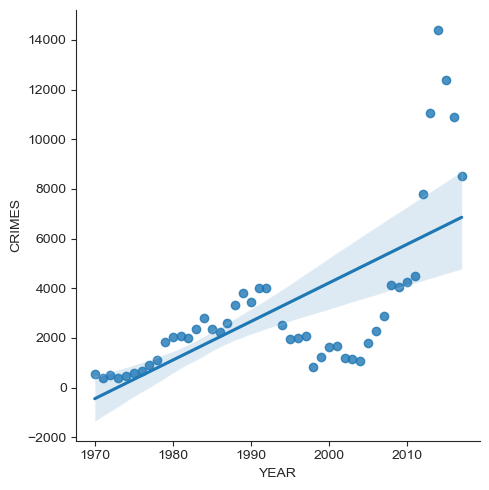

In [175]:
plt.figure(figsize=(5,6))
sns.lmplot(x="index", 
     y="year",
     data=year_wise)
plt.xlabel('YEAR')
plt.ylabel('CRIMES')
plt.show()

#### This trend show that the crimes have been increasing world wide since 1970's  

##  Crime Region Wise

In [176]:
region_wise = df.region.value_counts().reset_index()
region_wise

,index,region
0,Middle East & North Africa,43084
1,South Asia,37230
2,South America,15269
3,Sub-Saharan Africa,14411
4,Western Europe,12844
5,Southeast Asia,10665
6,Central America & Caribbean,8617
7,Eastern Europe,4567
8,North America,2922
9,Central Asia,489


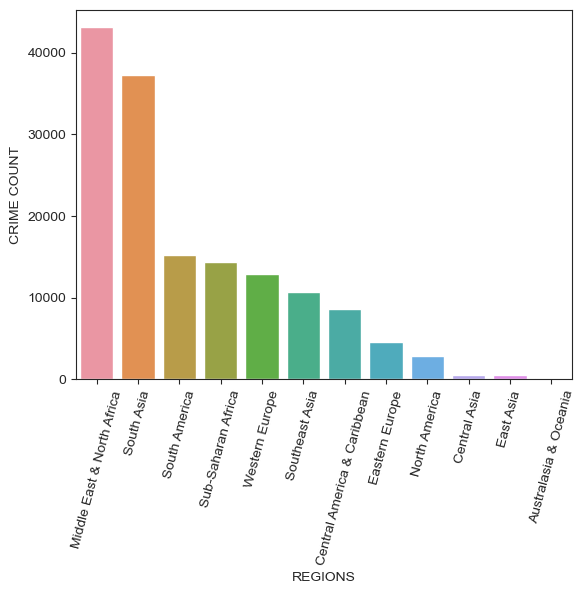

In [177]:
sns.countplot(x='region', data=df, order=df['region'].value_counts().index)
plt.xticks(rotation=75)
plt.xlabel('REGIONS')
plt.ylabel('CRIME COUNT')
plt.show()

#### it shows that Middle east & North Africa and South Asia have the highest crime count while east and central asia have almost no crime
#### this could be biased as well, because of lack of data for east and central asia also for Australasia & Oceania 

## Crime Count Country Wise 

In [178]:
ten_unsafe_countries = df.country.value_counts().head(10).reset_index(name='crime_count')
ten_unsafe_countries

,index,crime_count
0,Iraq,21701
1,Pakistan,12392
2,Afghanistan,10073
3,India,10016
4,Colombia,6370
5,Philippines,5911
6,Peru,5215
7,El Salvador,4596
8,United Kingdom,4398
9,Turkey,3639


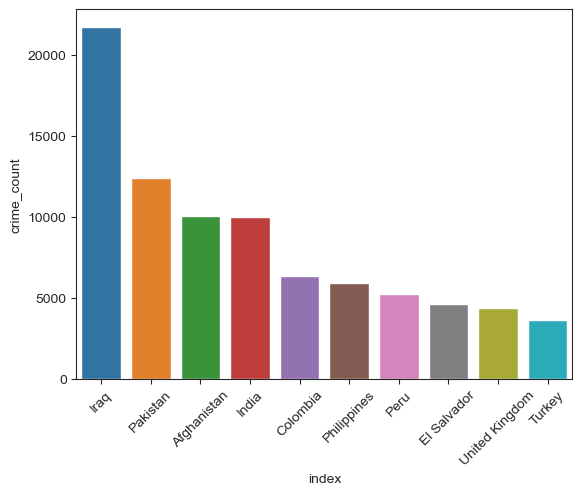

In [179]:
# plt.figure(figsize=(8,5))
sns.barplot(x='index', y='crime_count', data=ten_unsafe_countries)
plt.xticks(rotation=45)
plt.show()

#### countirs with the highest crime count

In [180]:
ten_safe_countries = df.country.value_counts().tail(25).reset_index(name='crime_count')
ten_safe_countries

,index,crime_count
0,Grenada,4
1,Western Sahara,3
2,Solomon Islands,3
3,Dominica,3
4,Iceland,3
5,Barbados,3
6,Gambia,2
7,Malawi,2
8,South Yemen,2
9,Seychelles,2


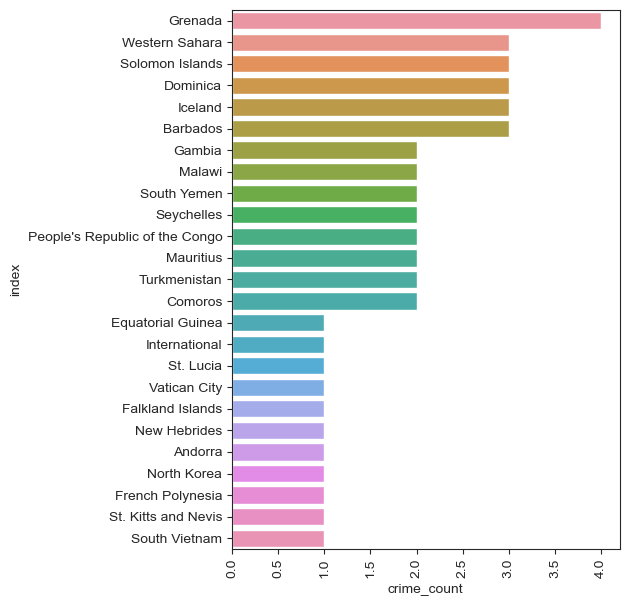

In [181]:
plt.figure(figsize=(5,7))
sns.barplot(y='index', x='crime_count', data=ten_safe_countries, orient='h')
plt.xticks(rotation=90)
plt.show()

#### countirs with the lowest crime count

In [182]:
df

,year,month,region,country,city,success,attacktype,targsubtype,weaptype,weapsubtype,group,targtype,natlty
3,1970,1,Western Europe,Greece,Athens,1,Bombing/Explosion,Embassy/Consulate,Explosives,Unknown Explosive Type,Unknown,Government (Diplomatic),United States
5,1970,1,North America,United States,Cairo,1,Armed Assault,"Police Building (headquarters, station, school)",Firearms,Unknown Gun Type,Black Nationalists,Police,United States
6,1970,1,South America,Uruguay,Montevideo,0,Assassination,Police Security Forces/Officers,Firearms,Automatic or Semi-Automatic Rifle,Tupamaros (Uruguay),Police,Uruguay
7,1970,1,North America,United States,Oakland,1,Bombing/Explosion,Electricity,Explosives,Unknown Explosive Type,Unknown,Utilities,United States
8,1970,1,North America,United States,Madison,1,Facility/Infrastructure Attack,Military Recruiting Station/Academy,Incendiary,Molotov Cocktail/Petrol Bomb,New Year's Gang,Military,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,12,South Asia,Afghanistan,Maymana,1,Bombing/Explosion,Retail/Grocery/Bakery,Explosives,Unknown Explosive Type,Unknown,Business,Afghanistan
181686,2017,12,Sub-Saharan Africa,Somalia,Ceelka Geelow,1,Armed Assault,Military Checkpoint,Firearms,Unknown Gun Type,Al-Shabaab,Military,Somalia
181687,2017,12,Middle East & North Africa,Syria,Jableh,1,Bombing/Explosion,Military Barracks/Base/Headquarters/Checkpost,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Muslim extremists,Military,Russia
181688,2017,12,Southeast Asia,Philippines,Kubentog,1,Facility/Infrastructure Attack,House/Apartment/Residence,Incendiary,Arson/Fire,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Philippines


## Most Dangerous Terrorist Groups (Grouped by Countries) 

In [183]:
top_terrorist_groups = df.groupby(['country','group'],as_index=False)['group'].value_counts()
top_terrorist_groups = top_terrorist_groups[top_terrorist_groups['count'] > 1000].sort_values('country')
top_terrorist_groups = top_terrorist_groups[top_terrorist_groups['group']!= 'Unknown']
top_terrorist_groups

,country,group,count
32,Afghanistan,Taliban,5765
596,Colombia,National Liberation Army of Colombia (ELN),1183
619,Colombia,Revolutionary Armed Forces of Colombia (FARC),1869
825,El Salvador,Farabundo Marti National Liberation Front (FMLN),3079
1437,India,Communist Party of India - Maoist (CPI-Maoist),1602
1530,India,Maoists,1124
1788,Iraq,Islamic State of Iraq and the Levant (ISIL),3623
2781,Nigeria,Boko Haram,1910
2960,Pakistan,Tehrik-i-Taliban Pakistan (TTP),1212
3023,Peru,Shining Path (SL),3936


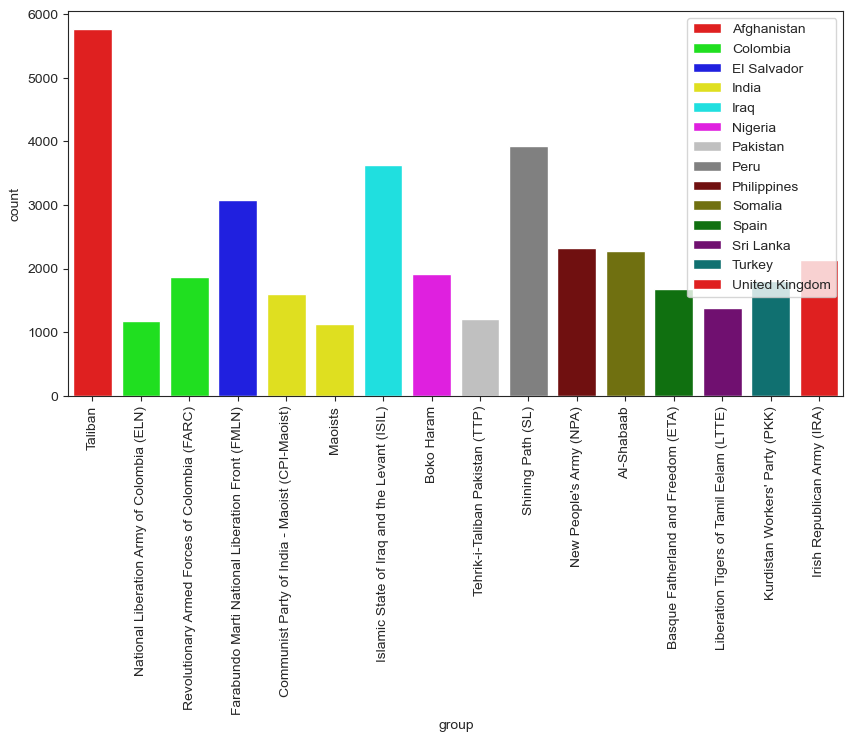

In [184]:
colors = [ 'Red', 'Lime', 'Blue', 'Yellow','Aqua','Fuchsia', 'Silver', 'Gray', 'Maroon', 'Olive', 'Green', 'Purple', 'Teal',]
plt.figure(figsize=(10,5))
sns.barplot(x='group',y='count',hue='country', data=top_terrorist_groups,palette=colors,dodge=False)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

#### Top terrorist groups grouped by their countries 

## Most Targeted People

In [185]:
df.head(1)

,year,month,region,country,city,success,attacktype,targsubtype,weaptype,weapsubtype,group,targtype,natlty
3,1970,1,Western Europe,Greece,Athens,1,Bombing/Explosion,Embassy/Consulate,Explosives,Unknown Explosive Type,Unknown,Government (Diplomatic),United States


In [186]:
most_targeted_people =df['natlty'].value_counts().reset_index().head(10)
most_targeted_people

,index,natlty
0,Iraq,21245
1,Pakistan,12018
2,India,10161
3,Afghanistan,9112
4,Colombia,6143
5,Philippines,5749
6,Peru,5021
7,El Salvador,4523
8,United States,4076
9,Turkey,3743


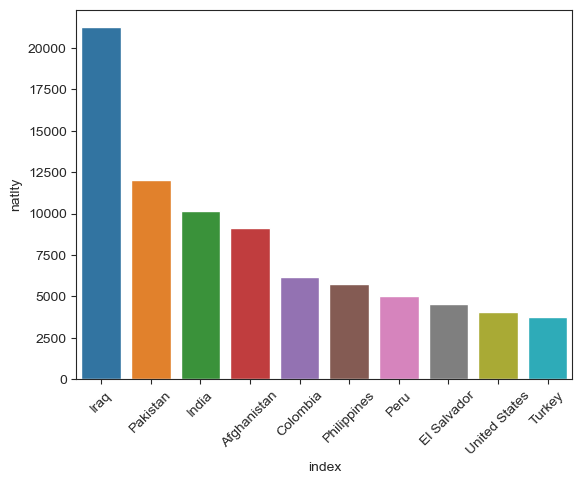

In [187]:
sns.barplot(y='natlty', x='index', data=most_targeted_people)
plt.xticks(rotation=45)
plt.show()

#### People from these nationalities are targeted the most

## In the last 5 years which countries had the most successful crimes 

In [188]:
country_year_wise_crime = df.groupby(['year','country'],as_index=False)['success'].sum().sort_values('success', ascending=False)
country_year_wise_crime

,year,country,success
3129,2014,Iraq,3394
3038,2013,Iraq,2630
3328,2016,Iraq,2401
3227,2015,Iraq,2151
3158,2014,Pakistan,1743
...,...,...,...
2995,2012,Venezuela,0
221,1976,Kenya,0
125,1974,Canada,0
2798,2010,Germany,0


In [189]:
last_5_years = country_year_wise_crime[country_year_wise_crime['year'] > 2012]
last_5_years = last_5_years[last_5_years['success'] > 500]

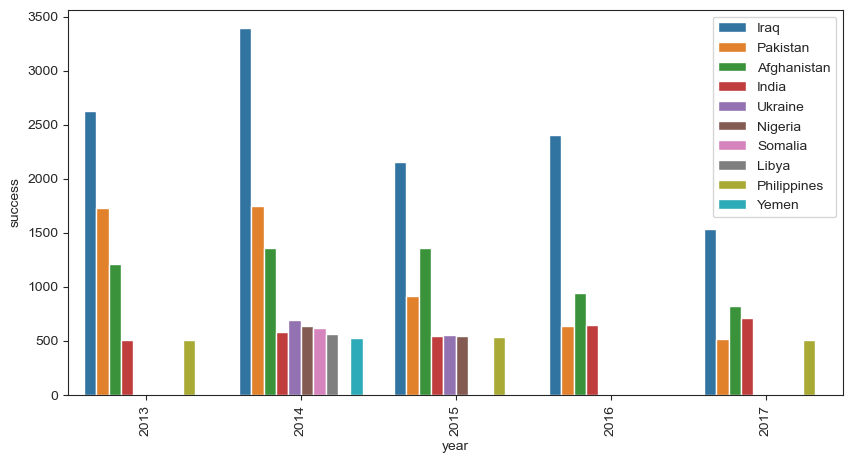

In [190]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='success',hue='country', data=last_5_years,dodge=True)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

#### In the last 5 years (prior to 2017) these countires had the highest success of attacks  

## Weapon Use 

In [191]:
df.head(1)

,year,month,region,country,city,success,attacktype,targsubtype,weaptype,weapsubtype,group,targtype,natlty
3,1970,1,Western Europe,Greece,Athens,1,Bombing/Explosion,Embassy/Consulate,Explosives,Unknown Explosive Type,Unknown,Government (Diplomatic),United States


In [192]:
weapon_cats = df.weaptype.value_counts().reset_index(drop=False)

In [193]:
weapon_cats = weapon_cats[(weapon_cats['index'] != 'Other') & (weapon_cats['index'] != 'Radiological')]

In [194]:
weapon_cats

,index,weaptype
0,Explosives,84581
1,Firearms,56636
2,Incendiary,5945
3,Melee,3475
4,Chemical,144


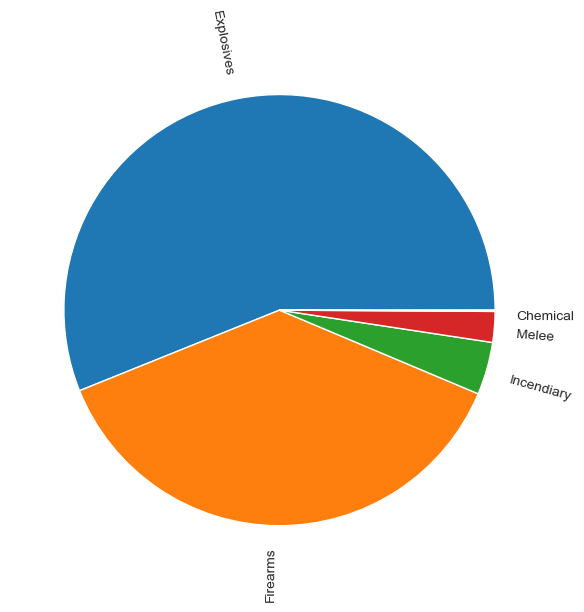

In [195]:
plt.figure(figsize=(9,7))
plt.pie(x = 'weaptype',data=weapon_cats,labels=weapon_cats['index'],rotatelabels=True)
plt.show()

#### explosives have been used the most

## Which terrorist group targeted which nationality people 

In [196]:
df

,year,month,region,country,city,success,attacktype,targsubtype,weaptype,weapsubtype,group,targtype,natlty
3,1970,1,Western Europe,Greece,Athens,1,Bombing/Explosion,Embassy/Consulate,Explosives,Unknown Explosive Type,Unknown,Government (Diplomatic),United States
5,1970,1,North America,United States,Cairo,1,Armed Assault,"Police Building (headquarters, station, school)",Firearms,Unknown Gun Type,Black Nationalists,Police,United States
6,1970,1,South America,Uruguay,Montevideo,0,Assassination,Police Security Forces/Officers,Firearms,Automatic or Semi-Automatic Rifle,Tupamaros (Uruguay),Police,Uruguay
7,1970,1,North America,United States,Oakland,1,Bombing/Explosion,Electricity,Explosives,Unknown Explosive Type,Unknown,Utilities,United States
8,1970,1,North America,United States,Madison,1,Facility/Infrastructure Attack,Military Recruiting Station/Academy,Incendiary,Molotov Cocktail/Petrol Bomb,New Year's Gang,Military,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,12,South Asia,Afghanistan,Maymana,1,Bombing/Explosion,Retail/Grocery/Bakery,Explosives,Unknown Explosive Type,Unknown,Business,Afghanistan
181686,2017,12,Sub-Saharan Africa,Somalia,Ceelka Geelow,1,Armed Assault,Military Checkpoint,Firearms,Unknown Gun Type,Al-Shabaab,Military,Somalia
181687,2017,12,Middle East & North Africa,Syria,Jableh,1,Bombing/Explosion,Military Barracks/Base/Headquarters/Checkpost,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Muslim extremists,Military,Russia
181688,2017,12,Southeast Asia,Philippines,Kubentog,1,Facility/Infrastructure Attack,House/Apartment/Residence,Incendiary,Arson/Fire,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Philippines


In [197]:
top_targets_by_group = df.groupby('group',as_index=False)['targtype'].value_counts()
top_targets_by_group

,group,targtype,count
0,1 May,Business,5
1,1 May,Government (Diplomatic),2
2,1 May,Government (General),2
3,1 May,Police,1
4,14 K Triad,Private Citizens & Property,3
...,...,...,...
7786,Zulu Militants,Private Citizens & Property,1
7787,Zuwar al-Imam Rida,Airports & Aircraft,1
7788,Zviadists,Government (Diplomatic),1
7789,Zwai Tribe,Business,1


In [198]:
top_targets_by_group = top_targets_by_group.sort_values(by=['count'],ascending=False).drop_duplicates(subset='group', keep='first').reset_index(drop=True).head(25)

In [199]:
top_targets_by_group.drop(0,axis=0, inplace=True)

In [200]:
top_targets_by_group

,group,targtype,count
1,Taliban,Police,1988
2,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,1752
3,Farabundo Marti National Liberation Front (FMLN),Military,1215
4,Al-Shabaab,Military,1130
5,Boko Haram,Private Citizens & Property,1012
6,New People's Army (NPA),Military,887
7,Irish Republican Army (IRA),Military,760
8,Shining Path (SL),Private Citizens & Property,739
9,Kurdistan Workers' Party (PKK),Military,728
10,Nicaraguan Democratic Force (FDN),Military,577


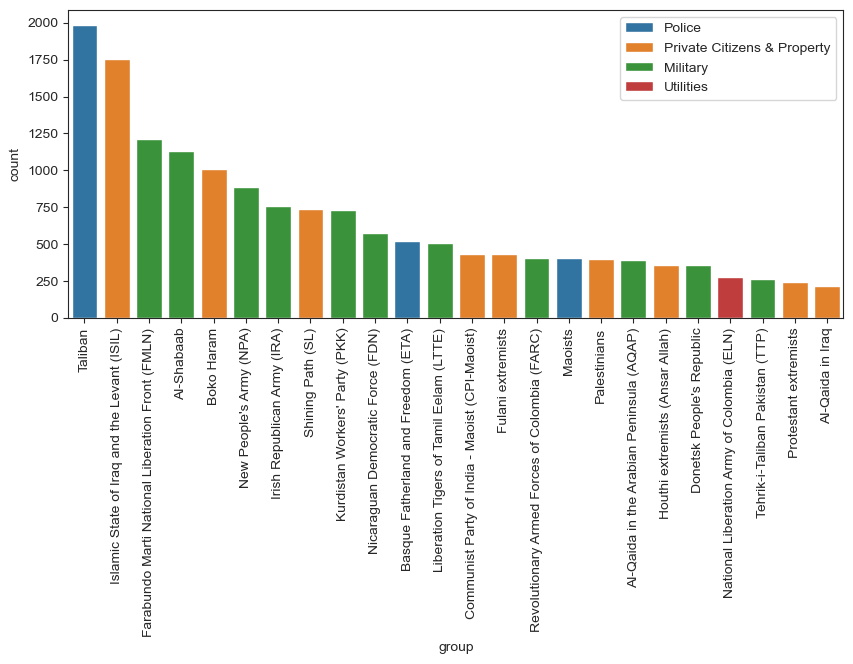

In [201]:
plt.figure(figsize=(10,4))
sns.barplot(x='group',y='count',hue='targtype', data=top_targets_by_group,dodge=False, orient='v')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

#### This chart shows which group targeted who the most (top 25)

# Key Insights :  